## Experiment No. 8 - Implement and test CNN for object recognition

Source 1 - https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/

Source 2 - https://www.pluralsight.com/guides/data-visualization-deep-learning-model-using-matplotlib


## Convolutional Neural Network

In [4]:
# baseline model with dropout on the cifar10 dataset
import sys
from tensorflow.python import keras
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, Dropout, MaxPooling2D, Activation
import numpy as np

 
# load train and test dataset
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = cifar10.load_data()
    X = np.vstack((trainX, testX))
    Y = np.vstack((trainY, testY))
    # one hot encode target values
    Y = to_categorical(Y)
    return X, Y
 
# scale pixels
def prep_pixels(data):
    # convert from integers to floats
    data_norm = data.astype('float32')
    # normalize to range 0-1
    data_norm = data_norm / 255.0
    # return normalized images
    return data_norm
 
# define cnn model
def define_model():
    
    img_rows = 32
    img_cols = 32
    dim = 3
    num_classes = 10
    
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform',input_shape=(img_rows, img_cols, dim)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(num_classes, activation='softmax'))
    # compile model
    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])
    return model

# load dataset
X, Y = load_dataset()
# prepare pixel data
X = prep_pixels(X)
print('Preprocessing Completed')
# define model
model = define_model()
print('Define Model Completed')
# fit model
#history = model.fit(trainX, trainY, epochs=10, batch_size=64, validation_data=(testX, testY), verbose=0)
history = model.fit(X, Y, epochs=10, batch_size=32, validation_split=0.2)
print('Model Fit Completed')

Preprocessing Completed
Define Model Completed
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 10s 204us/step - loss: 1.4081 - accuracy: 0.4936 - val_loss: 1.1504 - val_accuracy: 0.5913
Epoch 2/10
48000/48000 [==============================] - 9s 191us/step - loss: 0.9747 - accuracy: 0.6569 - val_loss: 0.8830 - val_accuracy: 0.6959
Epoch 3/10
48000/48000 [==============================] - 9s 180us/step - loss: 0.7853 - accuracy: 0.7255 - val_loss: 0.8437 - val_accuracy: 0.7089
Epoch 4/10
48000/48000 [==============================] - 9s 180us/step - loss: 0.6639 - accuracy: 0.7654 - val_loss: 0.8231 - val_accuracy: 0.7236
Epoch 5/10
48000/48000 [==============================] - 9s 182us/step - loss: 0.5710 - accuracy: 0.7993 - val_loss: 0.7721 - val_accuracy: 0.7387
Epoch 6/10
48000/48000 [==============================] - 9s 187us/step - loss: 0.4833 - accuracy: 0.8292 - val_loss: 0.8492 - val_accuracy: 0.7352
Epoch 7/10
480

## Training loss vs Validation loss

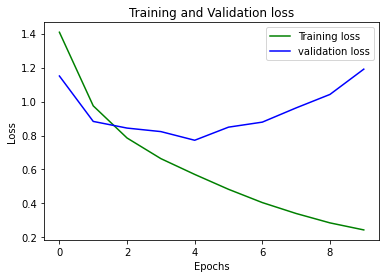

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], 'g', label='Training loss')
plt.plot(history.history['val_loss'], 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Training accuracy vs Validation accuracy

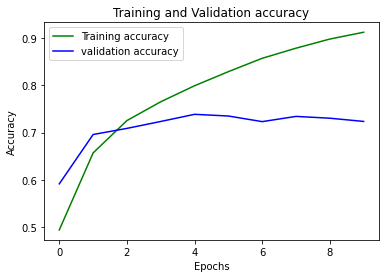

In [8]:

plt.plot(history.history['accuracy'], 'g', label='Training accuracy')
plt.plot(history.history['val_accuracy'], 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()